In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [2]:
train = pd.read_csv("C:\\Users\\sidar\\Downloads\\HousePrices\\train.csv")
test = pd.read_csv("C:\\Users\\sidar\\Downloads\\HousePrices\\test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:xlabel='LotArea', ylabel='Count'>

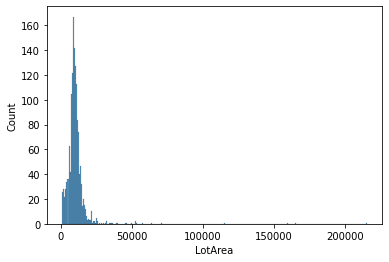

In [4]:
# Continuous Feature Histogram
sns.histplot(train['LotArea'])

(array([212.,  90., 272., 132., 302., 113., 138., 132.,  26.,  43.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

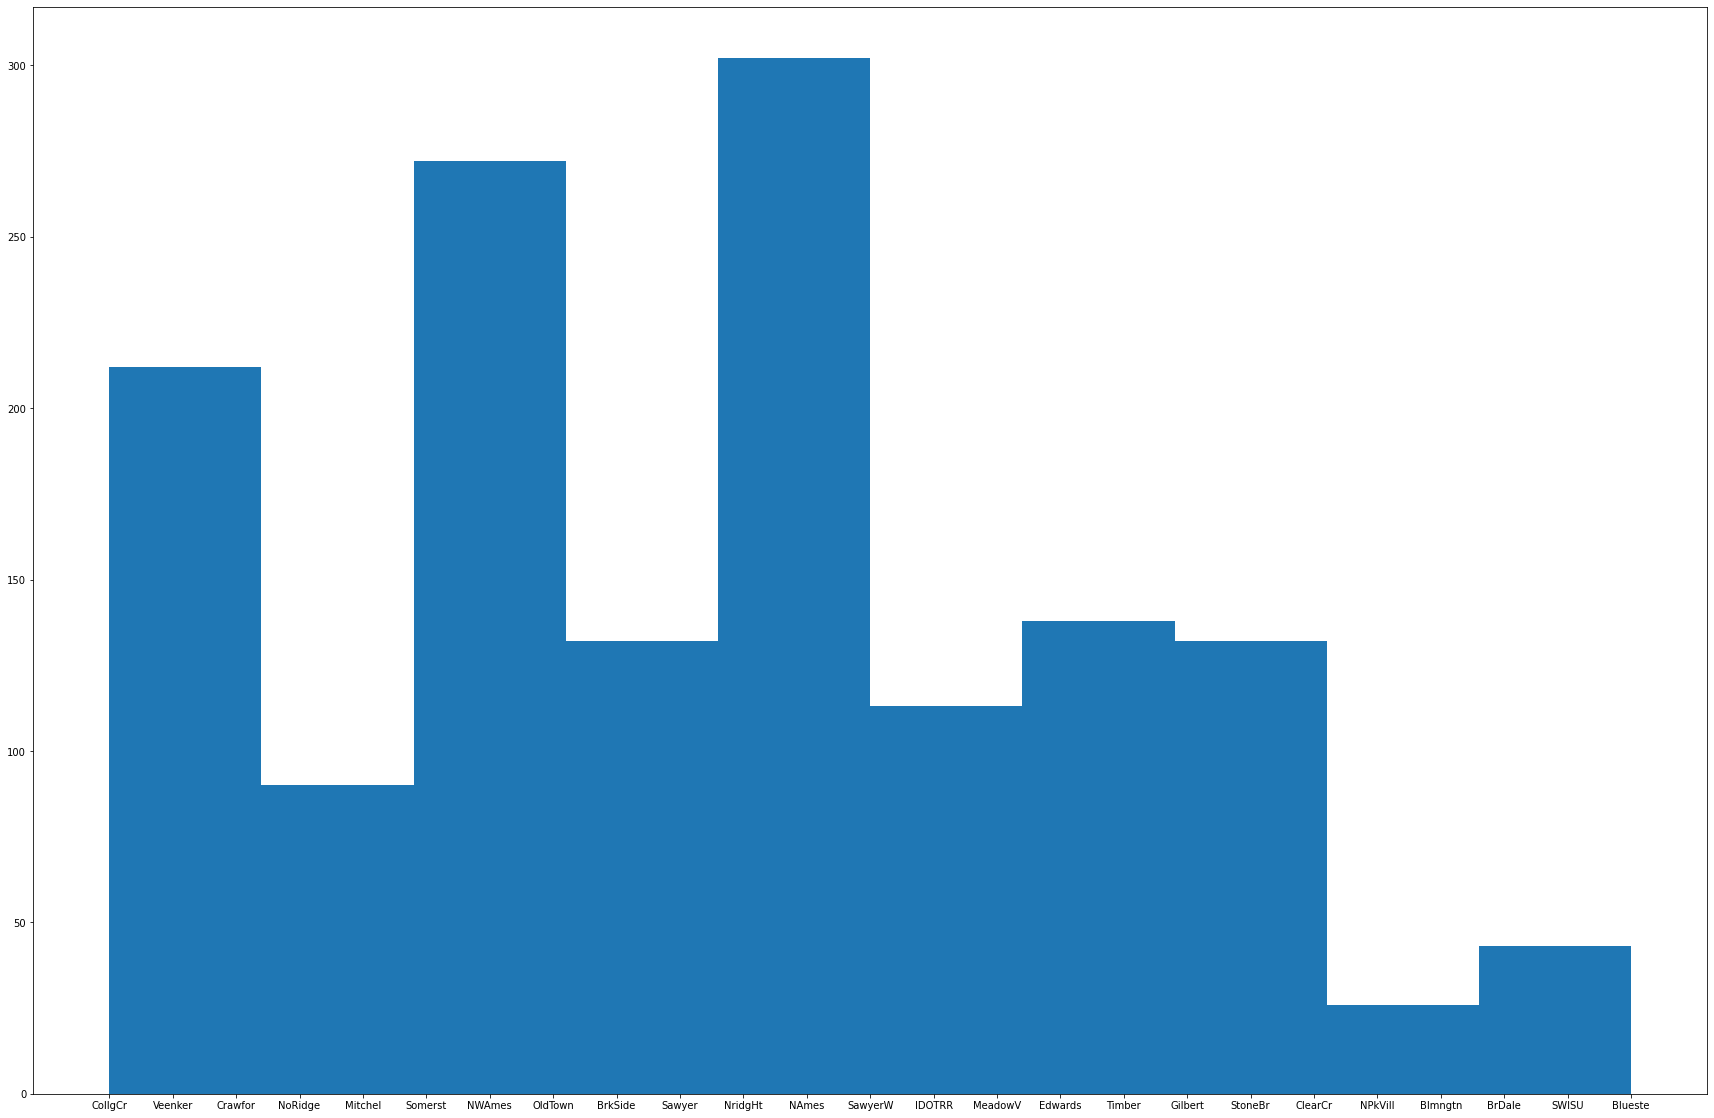

In [5]:
# categorical feature histogram: 
plt.figure(figsize=(30,20))
plt.hist(train['Neighborhood'])

In [6]:
# PREPROCESSING

In [7]:
# checking percentages of missing values across features

percentages = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False) * 100

percentages_test = (test.isnull().sum() / test.isnull().count()).sort_values(ascending=False) * 100
percentages.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

In [8]:
train = train.drop(['Id'], axis=1)
test_id = test['Id']
test = test.drop(['Id'], axis=1)

In [9]:
# Threshold for missing values assumed to be ~10%. If percentage is over 10%, dropping the column is considered.
# Since the top 6 in the above table (all above 10%) are not features that would have a high correlation with 
# the price of the house, we can safely drop the same.

train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)
test = test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)

In [10]:
# For the remaining data, in the interest of time, the attributes are not the primary concerns that a person looking to
# purchase considers. Furthermore, there are other variables that cover similar aspects that are likely to sway buyer
# decisions more (the total sq. ft. that the basement covers, the no. of cars that can be stored in the garage). Hence,
# these features are dropped as well. Masonry Veneer is another feature that does not seem like it woud have an impact,
# which means that it too is going to be dropped.

train = train.drop(['GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual'], axis=1)
train = train.drop(['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1'], axis=1)
train = train.drop(['MasVnrArea', 'MasVnrType'], axis=1)

test = test.drop(['GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual'], axis=1)
test = test.drop(['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1'], axis=1)
test = test.drop(['MasVnrArea', 'MasVnrType'], axis=1)

In [11]:
# The last remaining feature with a non-zero percentage is 'Electrical'. Since this is a more important feature and
# the missing values account for such a small percentage, we can just drop the missing values and keep the feature.

train = train.drop(train.loc[train['Electrical'].isnull()].index)
test = test.drop(test.loc[test['Electrical'].isnull()].index)

In [12]:
train_num = train.select_dtypes(include = ['float64', 'int64'])
test_num = test.select_dtypes(include = ['float64', 'int64'])

train_num.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>],
       [<AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>],
       [<AxesSubplot:title={'center':'BedroomA

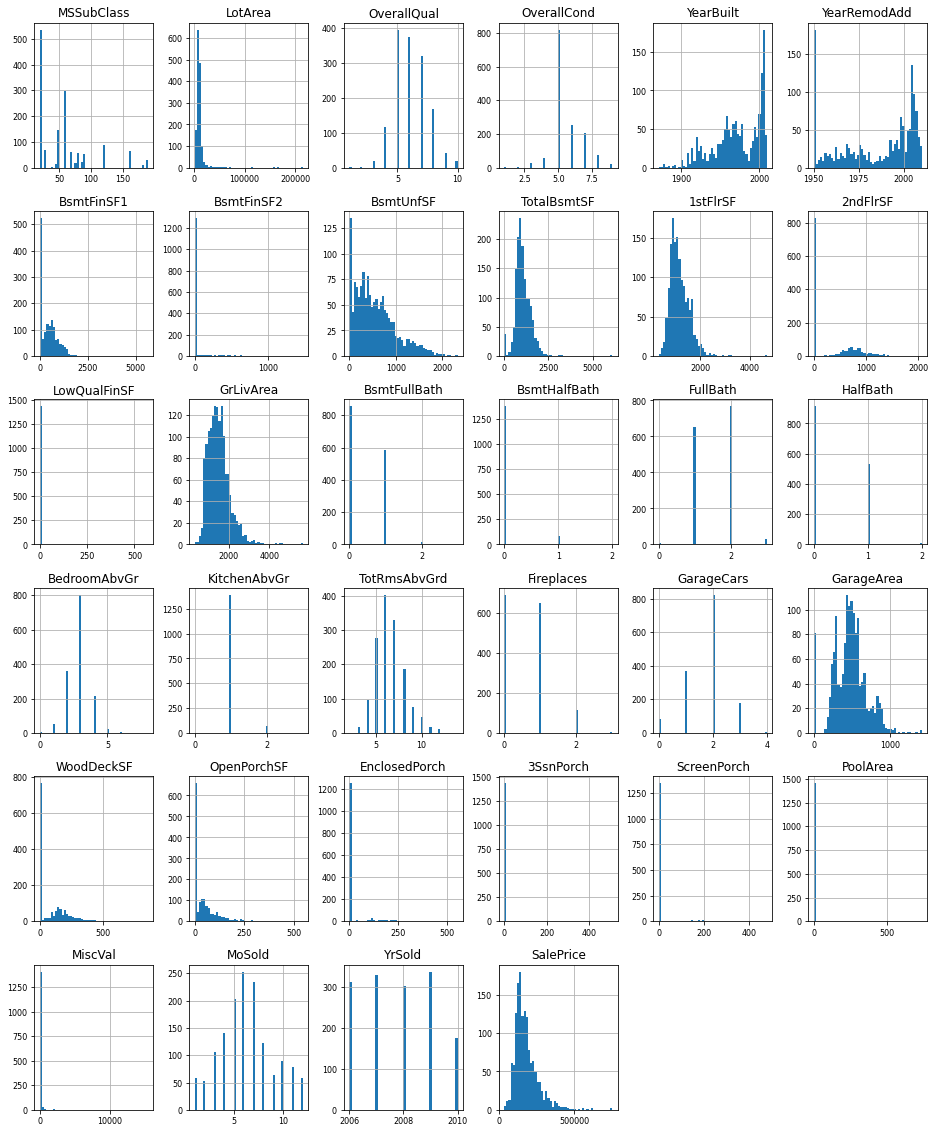

In [13]:
train_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [14]:
train_y = train_num['SalePrice']
train_num = train_num.drop(['SalePrice'], axis=1)
train_num = np.log1p(train_num)

test_num = test_num.select_dtypes(include = ['float64', 'int64'])
test_num = np.log1p(test_num)

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>],
       [<AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>],
       [<AxesSubplot:title={'center':'BedroomA

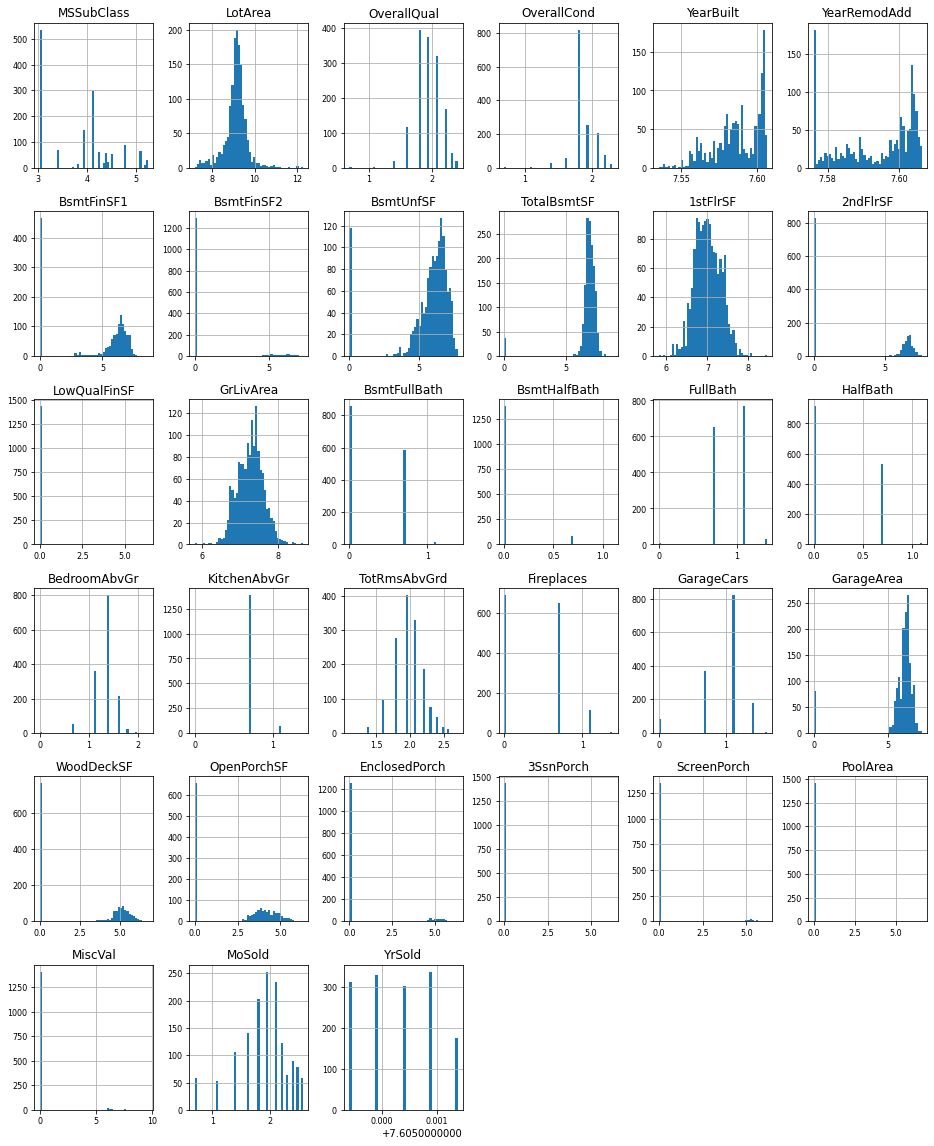

In [15]:
train_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [16]:
train_cat = train.select_dtypes(include = ['object'])
test_cat = test.select_dtypes(include = ['object'])

In [17]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Street         1459 non-null   object
 2   LotShape       1459 non-null   object
 3   LandContour    1459 non-null   object
 4   Utilities      1459 non-null   object
 5   LotConfig      1459 non-null   object
 6   LandSlope      1459 non-null   object
 7   Neighborhood   1459 non-null   object
 8   Condition1     1459 non-null   object
 9   Condition2     1459 non-null   object
 10  BldgType       1459 non-null   object
 11  HouseStyle     1459 non-null   object
 12  RoofStyle      1459 non-null   object
 13  RoofMatl       1459 non-null   object
 14  Exterior1st    1459 non-null   object
 15  Exterior2nd    1459 non-null   object
 16  ExterQual      1459 non-null   object
 17  ExterCond      1459 non-null   object
 18  Foundation     1459 non-null

(array([1453.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

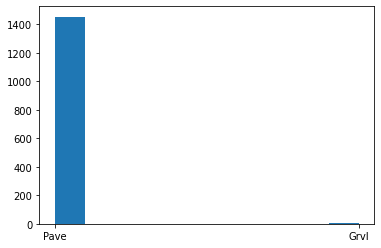

In [22]:
plt.hist(train_cat['Street'])

In [24]:
train_cat['Street'].head()

0    Pave
1    Pave
2    Pave
3    Pave
4    Pave
Name: Street, dtype: object

In [25]:
# SINCE we know that OHE leads to high dimensionality, we can only use variables that have a limited number of 
# categories, in order for them to be encoded efficiently. As such, we can use the following for OHE:
# Street
# LandSlope
# PavedDrive

cols = ["Street"]
train_ohe = pd.get_dummies(train_cat, columns=cols)
train_ohe = train_ohe[['Street_Grvl']]
test_ohe = pd.get_dummies(test_cat, columns=cols)
test_ohe = test_ohe[['Street_Grvl']]
train_ohe.head()

,Street_Grvl
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, 'Street: Gravel')

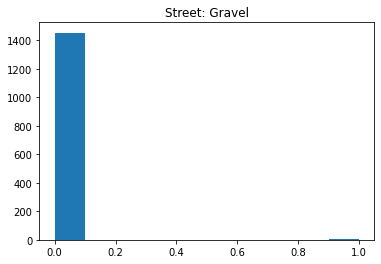

In [26]:
plt.hist(train_ohe['Street_Grvl'])
plt.title('Street: Gravel')

In [ ]:
final_train = pd.concat([train_num, train_ohe], axis=1)
final_test = pd.concat([test_num, test_ohe], axis=1)
final_train.info()

In [21]:
# Remaining categorical columns that need to be dealt with
#train_cat = train_cat.drop(cols, axis=1)
#test_cat = test_cat.drop(cols, axis=1)
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Street         1459 non-null   object
 2   LotShape       1459 non-null   object
 3   LandContour    1459 non-null   object
 4   Utilities      1459 non-null   object
 5   LotConfig      1459 non-null   object
 6   LandSlope      1459 non-null   object
 7   Neighborhood   1459 non-null   object
 8   Condition1     1459 non-null   object
 9   Condition2     1459 non-null   object
 10  BldgType       1459 non-null   object
 11  HouseStyle     1459 non-null   object
 12  RoofStyle      1459 non-null   object
 13  RoofMatl       1459 non-null   object
 14  Exterior1st    1459 non-null   object
 15  Exterior2nd    1459 non-null   object
 16  ExterQual      1459 non-null   object
 17  ExterCond      1459 non-null   object
 18  Foundation     1459 non-null

In [22]:
# Ordinal values can be encoded with integers that represent each of the categories. We can encode the following
# ordinal variables using LabelEncoder.
# 'ExterQual','ExterCond','HeatingQC','CentralAir','Electrical','KitchenQual','Functional', 'LotShape','Utilities',
# 'BldgType','HouseStyle','LotConfig'

label_enc_cols = ['ExterQual','ExterCond','HeatingQC','CentralAir','Electrical','KitchenQual','Functional', 
                  'LotShape', 'Utilities', 'BldgType','HouseStyle','LotConfig']
train_label_enc = train_cat[label_enc_cols].apply(preprocessing.LabelEncoder().fit_transform)
test_label_enc = test_cat[label_enc_cols].apply(preprocessing.LabelEncoder().fit_transform)

In [23]:
final_train = pd.concat([final_train, train_label_enc], axis=1)
final_test = pd.concat([final_test, test_label_enc], axis=1)
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   LotArea        1459 non-null   float64
 2   OverallQual    1459 non-null   float64
 3   OverallCond    1459 non-null   float64
 4   YearBuilt      1459 non-null   float64
 5   YearRemodAdd   1459 non-null   float64
 6   BsmtFinSF1     1459 non-null   float64
 7   BsmtFinSF2     1459 non-null   float64
 8   BsmtUnfSF      1459 non-null   float64
 9   TotalBsmtSF    1459 non-null   float64
 10  1stFlrSF       1459 non-null   float64
 11  2ndFlrSF       1459 non-null   float64
 12  LowQualFinSF   1459 non-null   float64
 13  GrLivArea      1459 non-null   float64
 14  BsmtFullBath   1459 non-null   float64
 15  BsmtHalfBath   1459 non-null   float64
 16  FullBath       1459 non-null   float64
 17  HalfBath       1459 non-null   float64
 18  BedroomA

In [24]:
train_X = final_train

test_X = final_test

In [25]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   LotArea        1459 non-null   float64
 2   OverallQual    1459 non-null   float64
 3   OverallCond    1459 non-null   float64
 4   YearBuilt      1459 non-null   float64
 5   YearRemodAdd   1459 non-null   float64
 6   BsmtFinSF1     1459 non-null   float64
 7   BsmtFinSF2     1459 non-null   float64
 8   BsmtUnfSF      1459 non-null   float64
 9   TotalBsmtSF    1459 non-null   float64
 10  1stFlrSF       1459 non-null   float64
 11  2ndFlrSF       1459 non-null   float64
 12  LowQualFinSF   1459 non-null   float64
 13  GrLivArea      1459 non-null   float64
 14  BsmtFullBath   1459 non-null   float64
 15  BsmtHalfBath   1459 non-null   float64
 16  FullBath       1459 non-null   float64
 17  HalfBath       1459 non-null   float64
 18  BedroomA

In [26]:
# Remaining categorical columns that need to be dealt with -----------------------------------------!!!!!!!!!
train_cat = train_cat.drop(label_enc_cols, axis=1)
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Street         1459 non-null   object
 2   LandContour    1459 non-null   object
 3   LandSlope      1459 non-null   object
 4   Neighborhood   1459 non-null   object
 5   Condition1     1459 non-null   object
 6   Condition2     1459 non-null   object
 7   RoofStyle      1459 non-null   object
 8   RoofMatl       1459 non-null   object
 9   Exterior1st    1459 non-null   object
 10  Exterior2nd    1459 non-null   object
 11  Foundation     1459 non-null   object
 12  Heating        1459 non-null   object
 13  PavedDrive     1459 non-null   object
 14  SaleType       1459 non-null   object
 15  SaleCondition  1459 non-null   object
dtypes: object(16)
memory usage: 193.8+ KB


In [27]:
theta_best = np.linalg.inv(train_X.T.dot(train_X)).dot(train_X.T).dot(train_y)
theta_best_df = pd.DataFrame(data=theta_best[np.newaxis, :], columns=train_X.columns)
theta_best_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,LotShape,Utilities,BldgType,HouseStyle,LotConfig
0,-6762.143511,15817.565333,66121.134915,31498.533765,447331.594282,-31785.66246,2012.268699,-794.222814,-1214.79634,1294.107123,...,-816.740036,-790.216872,-749.195344,-11586.568744,4914.341737,-183.278043,-60247.278797,272.455455,586.913953,-318.307278


(array([  7.,  43., 252., 472., 351., 198.,  84.,  37.,  11.,   1.]),
 array([-40085.99818863,  13807.31022301,  67700.61863465, 121593.9270463 ,
        175487.23545794, 229380.54386959, 283273.85228123, 337167.16069287,
        391060.46910452, 444953.77751616, 498847.0859278 ]),
 <BarContainer object of 10 artists>)

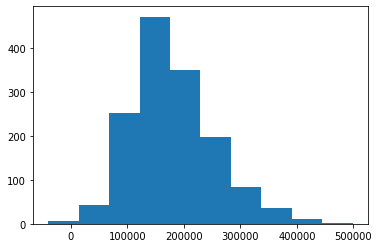

In [28]:
pred = test_X.dot(theta_best)
plt.hist(pred)

In [29]:
submission = pd.concat([test_id, pred], axis=1)
submission.columns = ['Id', 'SalePrice']
submission.head()

,Id,SalePrice
0,1461,112007.234527
1,1462,167616.745225
2,1463,181951.923183
3,1464,206559.235989
4,1465,204064.780493


In [30]:
submission.to_csv('submission.csv', index=False)